## Вопросы
1) ∆ - точность интервальной оценки то же самое, что и стандартная ошибка (se)?

Третью задачу мне хочется решить через стандартную ошибку, которая согласно центральной теореме равна se= σ/sqrt(n). Но каким образом в этой задаче замешан уровень доверия? 


2) что значит loc в `stats.norm.rvs(loc=17,scale=5,size=3000)`?

3) каким образом определять F-критерий Фишера по таблице если в первом датасете 35 значений, а во втором 93?

## Задание 1. 
**Найдите минимально необходимый объем выборки для построения интервальной оценки среднего с точностью ∆ = 3, дисперсией σ^2 = 225 и уровнем доверия β = 0.95.**

In [34]:
import numpy as np
import pandas as pd
import scipy.stats
import numpy as np
import statistics

- a (alpha) - вероятность, с которой значение параметра не попадет в доверительный интервал = 0,05

- уровень доверия β = 1-a - это вероятность того, что доверительный интервал (ДИ) накрывает значение параметра = 0,95

- ∆ - точность интервальной оценки = 3

- ∆ = σ*Z_a/sqrt(n), где Z_a - квантиль нормального распределения уровня 1-а/2 

- x'- среднее значение по выборке

- ДИ = (x' - ∆; x' + ∆)

- σ - станартное отклонение ГС      



$$ 1-a/2 = 1-0,05/2 = 0,975 $$
Следовательно по таблице Z_a = 1,96 (односторонний уровень)

$$ ∆ = σ*Z_a/sqrt(n) $$
$$ n = σ^2*Z_a^2/∆^2 $$
$$ n = 225*1,96^2/9 = 225*3,8416/9 = 96,04 = 97 $$

In [9]:
sigma = 15
Z = 1.96  # 97,5%
e = 3 #%

N = ((sigma*Z)/e)**2
N

96.03999999999998

## Задание 2. 
**Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001**

Уровень статистической значимости - максимально допускаемая вероятность ошибочного отклонения нулевой гипотезы. Нулевая гипотеза - равенство средних значений двух выборок.

In [10]:
import scipy.stats as stats

population_men = stats.norm.rvs(loc=19,scale=171,size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16,scale=165,size=12000)  # Выборка женщин со средним ростом 165



stats.ttest_ind(a=population_men, b=population_women, equal_var=False)

Ttest_indResult(statistic=1.598086307541447, pvalue=0.11005004051754971)

pvalue = 0,022 (что больше уровня значимости), а это значит, что мы не можем отклонить нулевую гипотезу.

## Задание 3. 
**Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей.** 

β = 0,95

σ = 150

∆ = 50

In [11]:
sigma = 150
Z = 1.96  # 97,5%
e = 50 #%



N = ((sigma*Z)/e)**2
N

34.5744

## Задание 4.  
**Представьте, что вы хотите разоблачить "волшебника", который считает, что умеет предсказывать погоду на завтра. Отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого периода времени и получили такие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду, 
если уровнь значимости принять за 0.05?**

In [12]:
observations = pd.DataFrame([[25,36],[15,44]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,25,36
Солнце,15,44


In [13]:
import scipy as sp 

oddsratio, pvalue = sp.stats.fisher_exact(observations)
pvalue 

0.08323639416753109

По таблице значений F-критерия Фишера при уровне значимости α =0,05 определяю критическое значение. Для 2 на 2 он равен 19.

Критерий Фишера выявляет "различия по разнообразию", то есть являются ли ответы волшебника более разнообразными нежели факт. Нулевая гипотеза - различий между выборками нет. Если статистика больше критического значения, соответствующего выбранному уровню значимости, то дисперсии случайных величин признаются не одинаковыми. В нашем случае я не могу отклонить нулевую гипотезу.

## Задача 5. 
**Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия 90% для выборки: data = [1,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5]**

In [14]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

In [21]:
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)
    return m-h,m, m+h




print(mean_confidence_interval(data, 0.90))

(6.074074746111319, 6.628571428571429, 7.183068111031539)


Небольшая проверка: логично, что наш ДИ должен находиться в более узких пределах чем (x-2сигма; x+2сигма), так как в этом пределе сосредоточено 95% всех данных. 

In [20]:
# ДИ для 95%

x = np.mean(data)
se = scipy.stats.sem(data)

print(x-2*se, x+2*se)

5.972196283298139 7.284946573844719


## Задача 6. 
**Принадлежит ли выборка data_1 и data_2 одному множеству? Оцените это с помощью известных вам тестов проверки гипотез.**

In [22]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

Если две выборки принадлежат одному множеству, то их средние должны относится к одной совокупности. 

In [24]:
# ДИ первой выборки с уровнем доверия 95%

x = np.mean(data_1)
se = scipy.stats.sem(data_1)
print(x-2*se, x+2*se)

5.972196283298139 7.284946573844719


In [25]:
# среднее второй выборки

x = np.mean(data_2)
print(x)

3.967741935483871


Среднее второй выборки не входит в множество первой выборки, поэтому эти выборки не принадлежат одному множеству. Ниже различные тесты.

In [26]:
# Тест Стьюдента, pvalue явно ниже 0,05, что позволяет отвергнуть нулевую гипотезу.

t , p  = stats.ttest_ind(data_1, data_2)
print("t = " + str(t))
print("p = " + str(p))

t = 7.35744682757447
p = 2.1159475572725764e-11


In [27]:
# two-sample t-test 

stats.ttest_ind(a=data_1,b=data_2,equal_var=False)

Ttest_indResult(statistic=7.068404675178226, pvalue=2.4974180382616264e-09)

Хи-тест для выборок, когда значения в долях, поэтому не применяем. 

## Задача 7. 
**На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение.** 

**Предположим, Вы сформировали две гипотезы:
Нулевая гипотеза - распределение нормальное, 
Альтернативная гипотеза - распределение не нормальное.**


**Допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости (p-value) = 0.03.
Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет? Вопрос без подвоха)**

Все рассмотренные нами тесты были предназначены для сравнения двух и более выборок (зависимых или независимых) и нулевая гипотеза по умолчанию - равенство средних двух выборок, принадлежность их к одному множеству. 
Для проверки на нормальность применяют например тест Шапиро-Уилка, где за нулевую гипотезу принимается "Анализируемая выборка происходит из генеральной совокупности, имеющей нормальное распределение". 
Если получаемая при помощи того или иного теста вероятность ошибки p оказывается меньше некоторого заранее принятого уровня значимости (например, 0.05), нулевая гипотеза отклоняется. Поэтому я вправе отклонить нулевую гипотезу, что распределение нормальное.

## Задача 8. 
**Первая выборка — это пациенты, которых лечили препаратом А. 
Вторая выборка — пациенты, которых лечили препаратом Б. Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.)** 

**а) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (уровень значимости принять за 5% или 0.05)**

**b) При каком минимальном P-values различия были бы уже значимы?**

Наличие значимого различия говорит о том, что выборки не относятся к единому множеству. И можно провести обычный t-тест. Судя по которому отклонить нулевую гипотезу нельзя. Возможность отклонить нулевую гипотезу появляется при pvalue равным уровню значимости (при мед исследованиях уровень значимости чаще всего равен 0,01), но гарантий не допустить ошибку первого рода нет.

In [47]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-1.25,size=300)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1a5ce80d0>]],
      dtype=object)

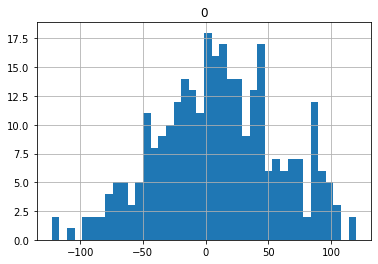

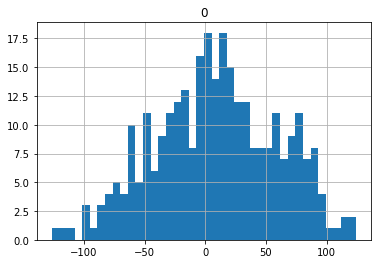

In [48]:
pd.DataFrame(A).hist(bins=40)
pd.DataFrame(B).hist(bins=40)

In [49]:
stats.ttest_ind(a=A,b=B,equal_var=False)

Ttest_indResult(statistic=0.33196234898293125, pvalue=0.7400341626811637)